In [ ]:
# chirp_mass = 8.74158695118774, mass_ratio = 0.5954198473282443
# total snr=50.49900392654228, h1,l1,v1=32.97061715259309,26.7935627149868,27.29821970730208
injection_parameters = dict(
    mass_1=13.1, mass_2=7.8, eccentricity=0.08, luminosity_distance=280.,
    theta_jn=0.2, psi=2.659, phase=1.3, geocent_time=1268431074.1, ra=1.375, dec=-1.2108)

18:16 bilby INFO    : Summary of results:                                                                                                                                         
nsamples: 11481                                                                                                                                                                   
ln_noise_evidence: -12609.616                                                                                                                                                     
ln_evidence: -11351.011 +/-  0.266                                                                                                                                                
ln_bayes_factor: 1258.604 +/-  0.266 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import bilby

In [2]:
result = bilby.result.read_in_result("TaylorF2EccPerAdvFDLeO512Hz_result.json")

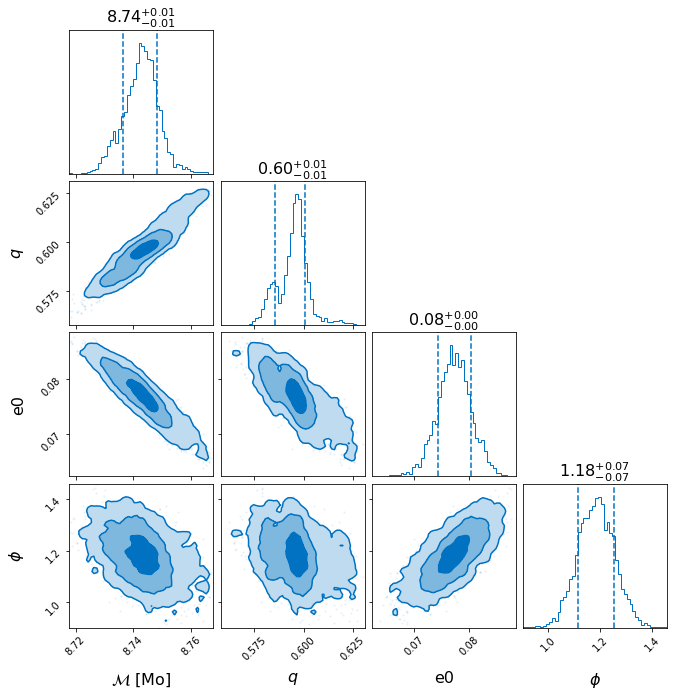

In [4]:
result.plot_corner(outdir='.')

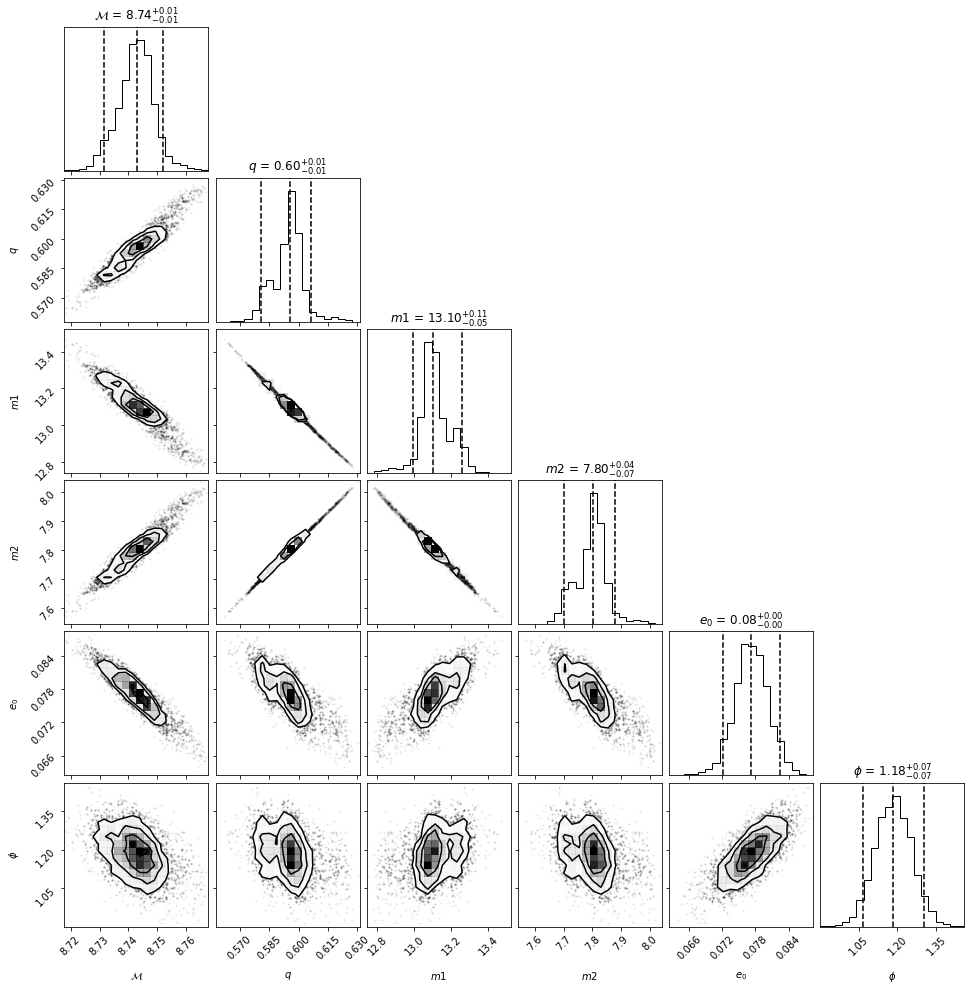

In [5]:
chirp_mass_ = result.posterior["chirp_mass"].values
mass_ratio_ =  result.posterior["mass_ratio"].values
e0 = result.posterior["eccentricity"].values
phi = result.posterior["phase"].values

m1 = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
m2 = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)

data = np.transpose(np.array([chirp_mass_,mass_ratio_,m1, m2,e0,phi]))
figure = corner.corner(data, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$m2$", r"$e_0$", r"$\phi$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})